In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

In [ ]:
df =pd.read_csv("/content/vista minable - solicitudes de traslado.csv" , header = 0 )

In [ ]:
df.nunique()

,0
Internal ID,5225
Class,4
Fecha y Hora,23069
Field,1
Old Value,8
New Value,10
Role,9
Sociedad Anónima,4
Ubicación Anónima,47
Nombre Anónimo,97


In [ ]:
df.shape

(23122, 12)

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


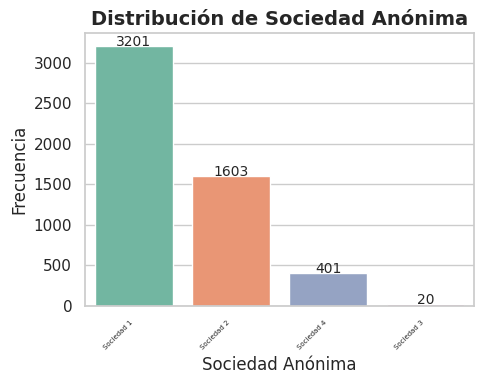

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


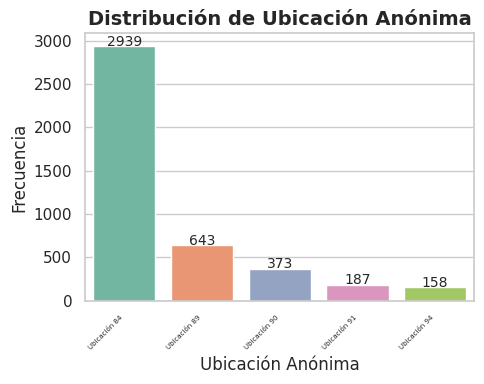

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


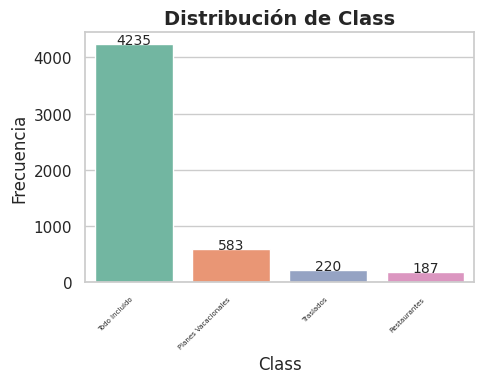

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_unique = df.drop_duplicates(subset= ['Internal ID'])

## NUMERO DE INTERACCIONES

# Set style for better aesthetics
sns.set(style="whitegrid")

# List of columns to plot
columns = ['Sociedad Anónima', 'Ubicación Anónima', 'Class']

# Assuming 'df_unique' and 'columns' are already defined
# Loop through each column and generate a count plot
for i in columns:
    # Get the top 5 most common categories in each column
    order = df_unique[i].value_counts().head().index

    # Create the count plot
    plt.figure(figsize=(5, 4))  # Adjust figure size
    ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=5)

    # Set plot titles and labels
    plt.title(f'Distribución de {i}', fontsize=14, fontweight='bold')
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Add count labels inside the bars using a loop for all patches
    for p in ax.patches:
        height = p.get_height()  # Get the height of the bar
        ax.text(
            p.get_x() + p.get_width() / 2.,  # Calculate the x-position for the label
            height + 3,  # Calculate the y-position for the label (adjust as needed)
            '{:1.0f}'.format(height),  # Format the label text (e.g., with 0 decimal places)
            ha="center",  # Horizontal alignment of the label
            fontsize=10,
        )

    # Show the plot with tight layout to prevent clipping
    plt.tight_layout()
    plt.show()

In [ ]:
# Tipo "class" que se tiene en el proceso
class_hotel = df.groupby('Ubicación Anónima')['Class'].nunique().sort_values(ascending=False).reset_index()
class_hotel['Class'].value_counts()

,count
Class,
1,41
2,6


In [ ]:
freq_new_value = df['New Value'].value_counts().reset_index() #reset_index(): This is used to turn the result of value_counts() into a DataFrame where the Value is the index and Frequency is the column.
freq_new_value.columns = ['Nombre Proceso' , 'Frecuencia en NV']

freq_old_value = df['Old Value'].value_counts().reset_index()
freq_old_value.columns = ['Nombre Proceso' , 'Frecuencia en OV']

freq_table = pd.merge ( freq_old_value , freq_new_value , on = 'Nombre Proceso' , how = 'outer' ).fillna(0)
freq_table


,Nombre Proceso,Frecuencia en OV,Frecuencia en NV
0,Aprobación Pendiente,5217.0,5225.0
1,Cerrado,0.0,795.0
2,Creada,5225.0,0.0
3,Ejecución de la orden pendiente,5017.0,5068.0
4,Parcialmente completado,331.0,445.0
5,Parcialmente ejecutada,1393.0,1786.0
6,Pending Fulfillment,2.0,2.0
7,Recepción pendiente,3689.0,3713.0
8,Recepción pendiente/Parcialmente ejecutado,2248.0,2255.0
9,Rechazado,0.0,147.0


In [ ]:
facturas_sociedad = df.groupby('Sociedad Anónima')['Internal ID'].nunique().sort_values(ascending=False).reset_index()
facturas_sociedad

,Sociedad Anónima,Internal ID
0,Sociedad 1,3201
1,Sociedad 2,1603
2,Sociedad 4,401
3,Sociedad 3,20


In [ ]:
##USUARIOS UNICOS QUE INTERVIENEN EN CADA FACTURACION
usuarios_factura = df.groupby('Internal ID')['Nombre Anónimo'].nunique().sort_values(ascending=False).reset_index()
usuarios_factura


,Internal ID,Nombre Anónimo
0,51408680,5
1,34633773,5
2,41197875,4
3,49911333,4
4,45588271,4
...,...,...
5220,57796437,1
5221,57796436,1
5222,57745596,1
5223,57745595,1


In [ ]:
usuarios_factura.describe()

,Internal ID,Nombre Anónimo
count,5.225000e+03,5225.000000
mean,5.041455e+07,1.906220
std,1.059933e+07,0.751982
min,3.329987e+07,1.000000
25%,4.098800e+07,1.000000
50%,4.988791e+07,2.000000
75%,5.980934e+07,2.000000
max,6.828927e+07,5.000000


In [ ]:
usuarios_proceso = df.groupby('New Value')['Nombre Anónimo'].nunique().sort_values(ascending=False).reset_index()
usuarios_proceso

,New Value,Nombre Anónimo
0,Aprobación Pendiente,72
1,Recibido,68
2,Recepción pendiente,60
3,Ejecución de la orden pendiente,30
4,Recepción pendiente/Parcialmente ejecutado,28
5,Cerrado,23
6,Parcialmente ejecutada,22
7,Rechazado,13
8,Parcialmente completado,12
9,Pending Fulfillment,1


In [ ]:
# 1. Average Timestamp by 'Document Number'
avg_timestamp_by_doc = df.groupby('Internal ID')['TimeStamp'].mean().reset_index()

# 2. Average Timestamp by 'New Value'
avg_timestamp_by_new_value = df.groupby('New Value')['TimeStamp'].mean().reset_index()

# Display the results
print("Average Timestamp by Internal ID:")
print(avg_timestamp_by_doc)

print("\nAverage Timestamp by New Value:")
print(avg_timestamp_by_new_value)

Average Timestamp by Internal ID:
      Internal ID    TimeStamp
0        33299871     7.272222
1        33299994     4.033333
2        33301825     2.872222
3        33302374    48.691667
4        33308760  1949.100000
...           ...          ...
5220     68274327    18.483333
5221     68274328    18.422222
5222     68280262     8.211111
5223     68285800     5.444444
5224     68289269     0.900000

[5225 rows x 2 columns]

Average Timestamp by New Value:
                                    New Value    TimeStamp
0                        Aprobación Pendiente  8904.617954
1                                     Cerrado          NaN
2             Ejecución de la orden pendiente   798.722288
3                     Parcialmente completado  1673.870270
4                      Parcialmente ejecutada  1652.958723
5                         Pending Fulfillment     3.233333
6                         Recepción pendiente  1883.981467
7  Recepción pendiente/Parcialmente ejecutado   596.259801
8    

In [ ]:
avg_timestamp_by_doc

,Internal ID,TimeStamp
0,33299871,7.272222
1,33299994,4.033333
2,33301825,2.872222
3,33302374,48.691667
4,33308760,1949.100000
...,...,...
5220,68274327,18.483333
5221,68274328,18.422222
5222,68280262,8.211111
5223,68285800,5.444444


In [ ]:
avg_timestamp_by_doc['TimeStamp'].mean()

np.float64(9671.086823780237)